In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt


 In the next step we will,

Load and Preprocess the Data

The dataset I chose was from IMDB
Load the IMDb dataset: 
The dataset comes preprocessed with the most frequent words already tokenized.

Pad sequences:
Ensure all sequences are of the same length by padding them.

In [7]:
# Set parameters
vocab_size = 10000
max_len = 100

# Load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure uniform input length
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 175s 10us/step


Build the Basic RNN Model

Embedding Layer: Converts integer-encoded words into dense vectors of fixed size.
SimpleRNN Layer: Basic recurrent layer that processes the input sequence.
Dense Layer: Fully connected layer for output.


In [8]:
# Build the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
model.add(SimpleRNN(units=128, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 52s 112ms/step - accuracy: 0.5609 - loss: 0.6716 - val_accuracy: 0.7975 - val_loss: 0.4396
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 75s 94ms/step - accuracy: 0.8218 - loss: 0.4012 - val_accuracy: 0.6677 - val_loss: 0.6022
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.8724 - loss: 0.3144 - val_accuracy: 0.5936 - val_loss: 0.6991
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 100ms/step - accuracy: 0.9029 - loss: 0.2348 - val_accuracy: 0.7461 - val_loss: 0.7179
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 85ms/step - accuracy: 0.9722 - loss: 0.0827 - val_accuracy: 0.7648 - val_loss: 0.7059


Evaluate the Model
Check the model’s accuracy on the test data.

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.2f}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7591 - loss: 0.7255
Test Accuracy: 0.76


Analyze Results
Plot training history: Visualize training and validation accuracy and loss.

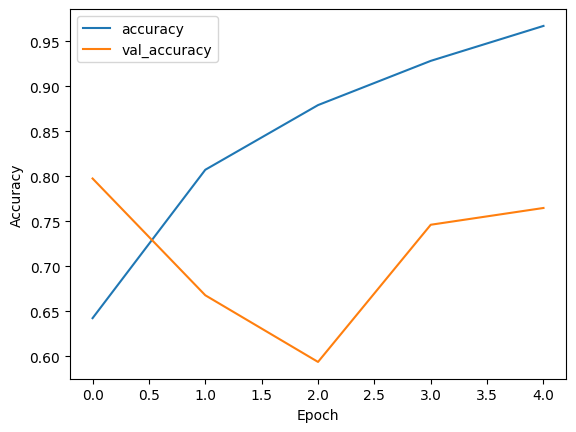

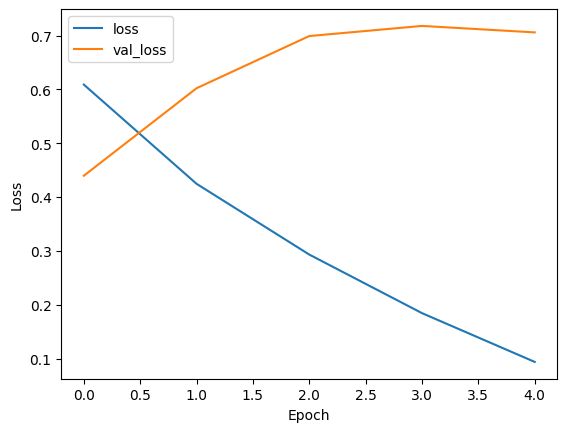

In [10]:


# Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
